In [1]:
import numpy as np
import astropy.table
% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
mydata = '/melkor/d1/guenther/Dropbox/my_articles/YSOVAR_L1688/electronictable_sourceproperties.txt'
ludata = '/melkor/d1/guenther/projects/misc/YSOVAR/RhoOph/LuisaIPAC/l1688deliveryobjecttable.tbl'

In [3]:
art  = astropy.table.Table.read(mydata, format='ascii')
lu = astropy.table.Table.read(ludata, format='ascii')
art['SSTYSV_J'] = [s[8:] for s in art['IAU_NAME']]
m = astropy.table.join(art, lu, keys='SSTYSV_J')

## Find sources that are only in one of the catalogs

In [4]:
# Print object that are in my able, but not in Luisa's
set(art['SSTYSV_J']) - set(lu['SSTYSV_J'])

{'162613.49-243111.5',
 '162616.75-242956.2',
 '162616.84-242223.1',
 '162617.79-242113.4',
 '162618.69-242157.5',
 '162621.01-241541.4',
 '162621.75-242326.0',
 '162623.13-241338.0',
 '162625.94-242104.5',
 '162626.22-241650.8',
 '162628.99-242724.8',
 '162634.45-241657.0',
 '162635.42-241655.1',
 '162638.47-241827.4',
 '162714.49-242646.0',
 '162714.85-244604.6',
 '162715.17-242852.8',
 '162716.53-242209.8',
 '162716.75-244823.8',
 '162717.04-242201.2',
 '162717.76-242007.6',
 '162717.88-244956.8',
 '162717.89-242121.2',
 '162718.05-242031.9',
 '162718.13-242021.4',
 '162718.58-244840.8',
 '162719.13-244811.2',
 '162721.69-241934.4',
 '162721.92-244713.6',
 '162722.18-242044.6',
 '162722.61-243414.6',
 '162723.41-245008.2',
 '162723.86-242013.9',
 '162723.96-244808.8',
 '162724.74-241916.8',
 '162725.39-243251.6',
 '162725.63-243728.6',
 '162726.65-242052.3',
 '162727.48-242535.3',
 '162727.48-243732.2',
 '162727.94-243709.8',
 '162728.49-243549.9',
 '162729.42-244021.1',
 '162731.78

In [5]:
# Print objects that are in Luisa's table, but not in mine
set(lu['SSTYSV_J']) - set(art['SSTYSV_J'])

{'162612.78-243116.3',
 '162726.90-243110.5',
 '162730.49-244126.6',
 '162739.53-244017.5'}

I expected some differences, because Luisa used the imrpoved cleaning of lightcurves, but this is almost 10 %. Maybe that's OK, but I wanted to call that out so we can talk about it.
From here on, I'll only use the sources that I find in both catalogs.

In [7]:
# Make a list of strings that represent derived properties 
moritz = ['min', 'max', 'mean','stddev','delta','redchi2tomean']
luisa = ['min', 'max', 'mean', 'sdev', 'ampl', 'chis']

## Compare fast cadence derived properties for 3.6 mu

In [8]:
moritzfast36 = [s + 's1_36' for s in moritz]
luisafast36 = [s + '_36f' for s in luisa]

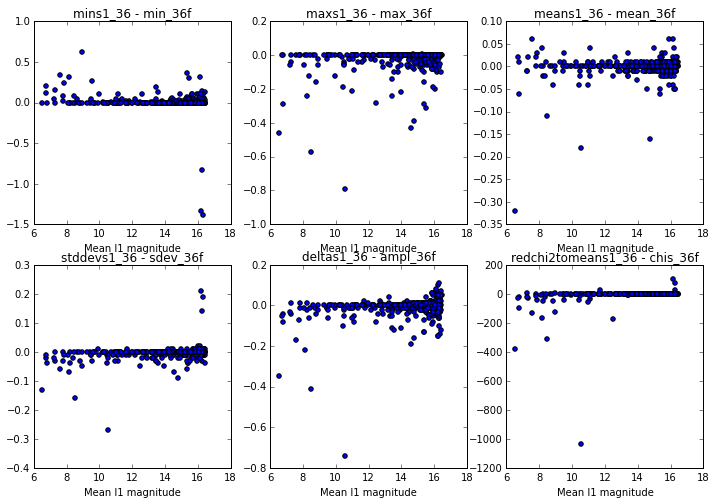

In [19]:
fig = plt.figure(figsize=(12,8))
for i in range(6):
    ax = fig.add_subplot(2, 3,i+1)
    ax.scatter(m['means1_36'], m[moritzfast36[i]] - m[luisafast36[i]])
    ax.set_xlabel('Mean I1 magnitude')
    ax.set_title('{0} - {1}'.format(moritzfast36[i], luisafast36[i]))

## Compare fast cadence derived properties for 4.5 mu

In [16]:
moritzfast45 = [s + 's1_45' for s in moritz]
luisafast45 = [s + '_45f' for s in luisa]

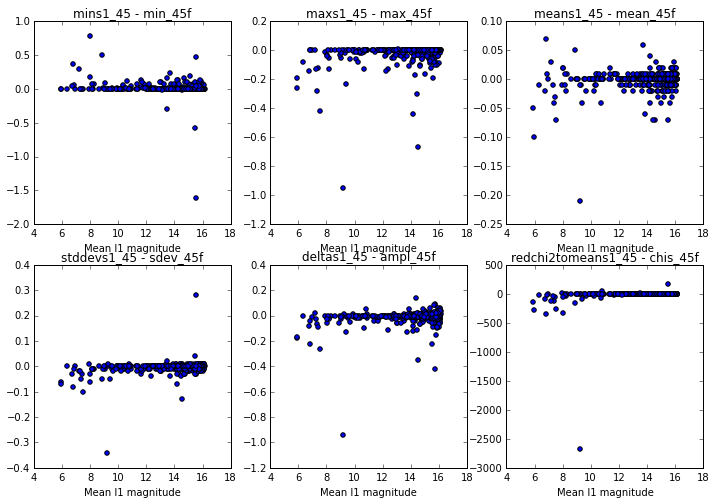

In [18]:
fig = plt.figure(figsize=(12,8))
for i in range(6):
    ax = fig.add_subplot(2, 3,i+1)
    ax.scatter(m['means1_45'], m[moritzfast45[i]] - m[luisafast45[i]])
    ax.set_xlabel('Mean I1 magnitude')
    ax.set_title('{0} - {1}'.format(moritzfast45[i], luisafast45[i]))

## Same thing for all data points (not just fast cadence)

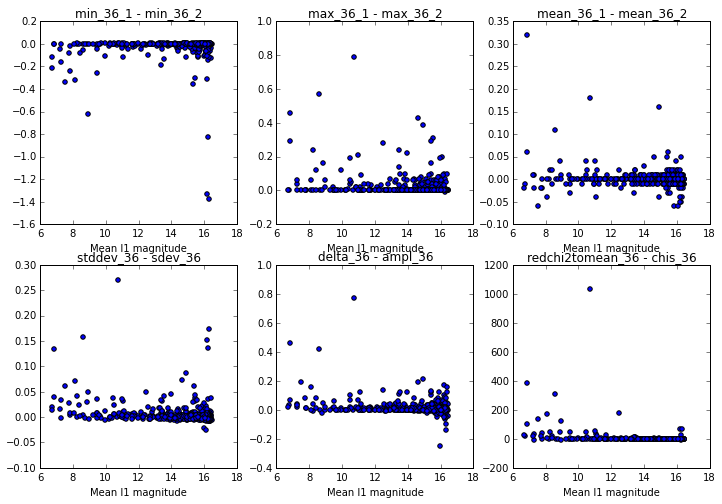

In [24]:
moritz = ['min_36_1', 'max_36_1', 'mean_36_1','stddev_36','delta_36','redchi2tomean_36']
luisa = ['min_36_2', 'max_36_2', 'mean_36_2', 'sdev_36', 'ampl_36', 'chis_36']

fig = plt.figure(figsize=(12,8))
for i in range(6):
    ax = fig.add_subplot(2, 3,i+1)
    ax.scatter(m['mean_36_1'], m[moritz[i]] - m[luisa[i]])
    ax.set_xlabel('Mean I1 magnitude')
    ax.set_title('{0} - {1}'.format(moritz[i], luisa[i]))